In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\padal\OneDrive\Desktop\Data Science\sales.csv")
df

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes,yes
2,3,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
3,4,117,100,4,466,97,Medium,55,14,Yes,Yes,no
4,5,141,64,3,340,128,Bad,38,13,Yes,No,no
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,138,108,17,203,128,Good,33,14,Yes,Yes,yes
396,397,139,23,3,37,120,Medium,55,11,No,Yes,no
397,398,162,26,12,368,159,Medium,40,18,Yes,Yes,no
398,399,100,79,7,284,95,Bad,50,12,Yes,Yes,no


In [2]:
x_cont= df[df.columns[[1,2,3,4,5,7]]]
x_cont

,CompPrice,Income,Advertising,Population,Price,Age
0,138,73,11,276,120,42
1,111,48,16,260,83,65
2,113,35,10,269,80,59
3,117,100,4,466,97,55
4,141,64,3,340,128,38
...,...,...,...,...,...,...
395,138,108,17,203,128,33
396,139,23,3,37,120,55
397,162,26,12,368,159,40
398,100,79,7,284,95,50


In [3]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(x_cont)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df.columns[[1,2,3,4,5,7]])
SS_X

,CompPrice,Income,Advertising,Population,Price,Age
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000
...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346


In [4]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])
df["Urban"]     = LE.fit_transform(df["Urban"])
df["US"]        = LE.fit_transform(df["US"])
df["high"]      = LE.fit_transform(df["high"])
df.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,0,42,17,1,1,1
1,2,111,48,16,260,83,1,65,10,1,1,1
2,3,113,35,10,269,80,2,59,12,1,1,1
3,4,117,100,4,466,97,2,55,14,1,1,0
4,5,141,64,3,340,128,0,38,13,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int32
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int32
 10  US           400 non-null    int32
 11  high         400 non-null    int32
dtypes: int32(4), int64(8)
memory usage: 31.4 KB


In [6]:
df_cat = df[df.columns[[6,8,9,10,11]]]

In [7]:
df_new = pd.concat([SS_X,df_cat],axis=1)
df_new

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc,Education,Urban,US,high
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,0,17,1,1,1
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,1,10,1,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,2,12,1,1,1
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,2,14,1,1,0
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,0,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-1.256023,1,14,1,1,1
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.103677,2,11,0,1,0
397,2.417512,-1.526151,0.807733,0.700853,1.827078,-0.823391,2,18,1,1,0
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-0.205346,0,12,1,1,0


In [8]:
# data partition
Y = df_new["high"]
X = df_new.drop(df_new[['high']],axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3)

In [10]:
from sklearn.tree import DecisionTreeClassifier   # decision tree regressor
model = DecisionTreeClassifier(criterion='gini') # entropy
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [11]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, log_loss
training_accuracy  = accuracy_score(Y_train,Y_pred_train)
test_accuracy  = accuracy_score(Y_test,Y_pred_test)
training_loss  = log_loss(Y_train,Y_pred_train)
test_loss  = log_loss(Y_test,Y_pred_test)

In [13]:
import numpy as np
print("trianing accuracy:", np.round(training_accuracy,2))
print("test accuracy:", np.round(test_accuracy,2))
print("trianing loss:", np.round(training_loss,2))
print("test loss:", np.round(test_loss,2))

trianing accuracy: 1.0
test accuracy: 0.78
trianing loss: 0.0
test loss: 7.77


In [14]:
# shuffle split
training_accracy = []
test_accuracy = []
training_loss = []
test_loss = []

In [15]:
for i in range(1, 501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=i, stratify=Y)
    model = DecisionTreeClassifier(criterion='gini',max_depth=7) # 'entropy'
    model.fit(X_train,Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    training_accracy.append(accuracy_score(Y_train,y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,y_pred_test))
    training_loss.append(log_loss(Y_train,Y_pred_train))
    test_loss.append(log_loss(Y_test,Y_pred_test))

In [16]:
print("Cross validation: Training accuracy score:", np.round(np.mean(training_accracy),2))
print("Cross validation: Test accuracy score:", np.round(np.mean(test_accuracy),2))
print("Cross validation: trianing loss:", np.round(np.mean(training_loss),2))
print("Cross validation: test loss:", np.round(np.mean(test_loss),2))

Cross validation: Training accuracy score: 0.96
Cross validation: Test accuracy score: 0.73
Cross validation: trianing loss: 16.54
Cross validation: test loss: 16.98


In [17]:
# prompt: visualize the decision tree from above model

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

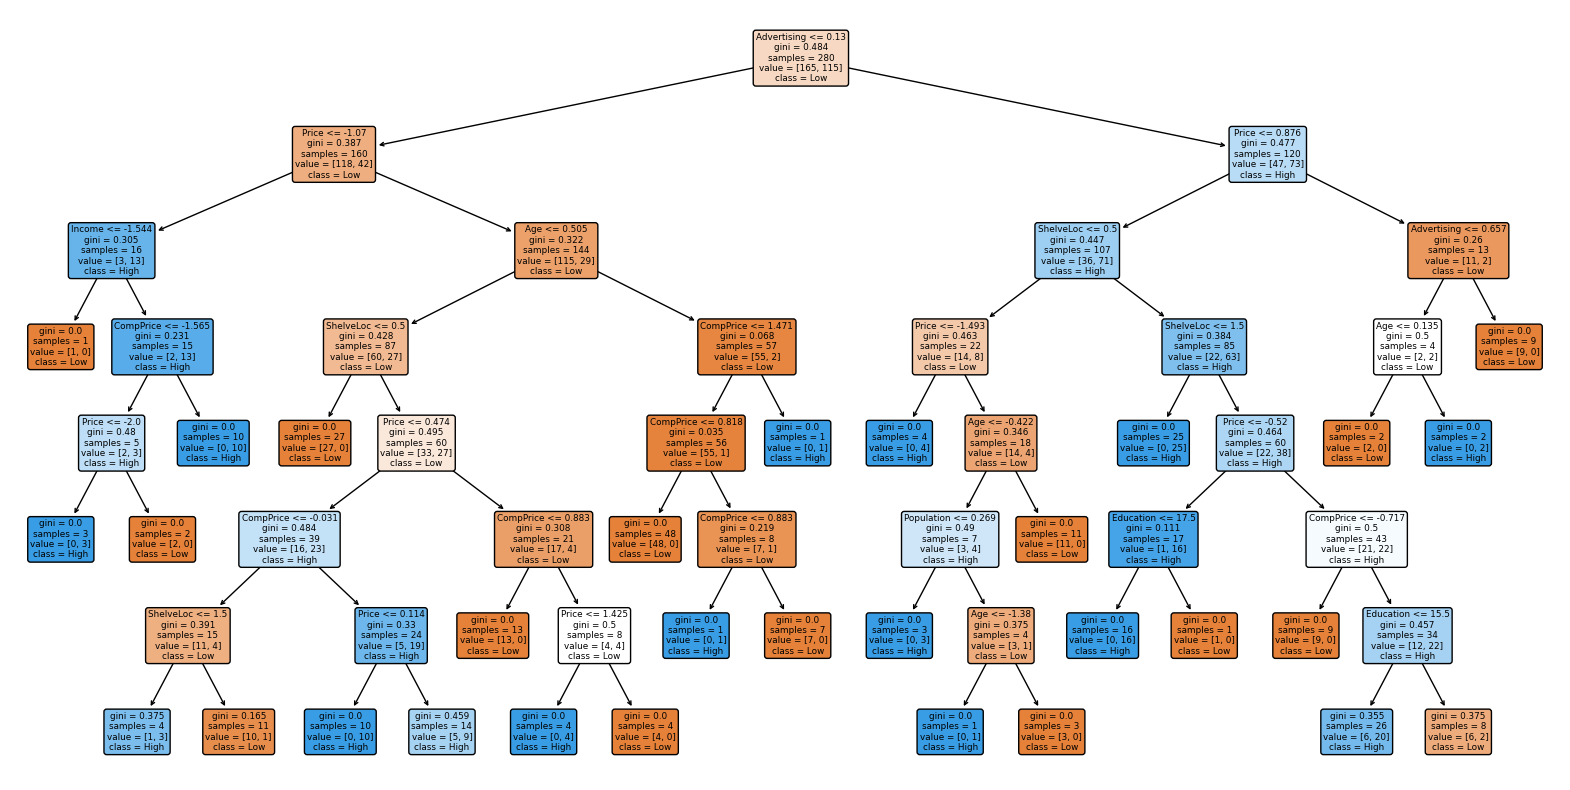

In [18]:
# Assuming 'model' is your trained DecisionTreeClassifier
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Low', 'High'], rounded=True) # Assuming 'high' represents two classes: Low and High
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier
# ... (Your existing code) ...

# Assuming 'model' is your trained DecisionTreeClassifier
n_nodes = model.tree_.node_count
depth = model.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")

Number of nodes: 59
Depth of the tree: 7
